In [26]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_20micros_mb_fixed_t1.xtc'

In [62]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

path_data = path
path_res = path

fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1.xtc'

In [63]:
u = mda.Universe( path_data+fgro, path_data+fxtc)

In [64]:
sel_all = u.select_atoms("all and resname DPPC")

for ts in u.trajectory:
    PO4 = u.select_atoms("name PO4 and resname DPPC") # and resname D*PC pour avoir juste les rouges

In [65]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [7]:
# Attention apparemment il y a un lipide qui dépasse dans la simus 3:5:2!
# contient 20000 frames

In [66]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5254
number of lipids in the upper leaflet: 2658 + number of lipids in the lower leaflet:2596 
= 5254


In [73]:
# TAKE THE LAST FRAME

u.trajectory[19999]

< Timestep 19999 with unit cell dimensions [432.01205 432.01205 189.38124  90.       90.       90.     ] >

Text(0.5,1,'Répartition des espèces')

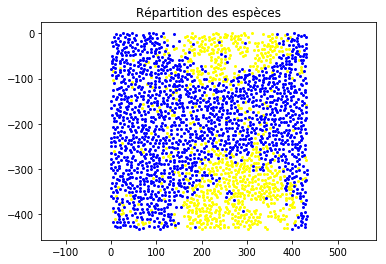

In [74]:
xmin=0
ymin=0

Lo = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
plt.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
plt.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

plt.axis('equal')
plt.title('Répartition des espèces',fontsize=12)

In [75]:
print(np.shape(Lo))
print(np.shape(Ld))

(855, 3)
(1653, 3)


In [76]:
# create a matrix for each phase with a 4th column that returns 1 if the phase is Lo and 0 if it's Ld

Lo2 = np.zeros((len(Lo),4))
Lo2[:,0] = Lo[:,0]
Lo2[:,1] = Lo[:,1]
Lo2[:,2] = Lo[:,2]
Lo2[:,3] = 1

Ld2 = np.zeros((len(Ld),4))
Ld2[:,0] = Ld[:,0]
Ld2[:,1] = Ld[:,1]
Ld2[:,2] = Ld[:,2]
Ld2[:,3] = 0

print(Lo2)
print(Ld2)

[[361.98001099 202.64001465  85.65000916   1.        ]
 [275.71002197 254.6900177   64.5          1.        ]
 [409.3800354  375.82000732  82.3500061    1.        ]
 ...
 [323.37002563 340.01004028  68.69000244   1.        ]
 [ 55.16000366 259.62002563  92.62000275   1.        ]
 [309.55999756 250.66001892  76.99000549   1.        ]]
[[220.8500061  429.66003418  54.72999954   0.        ]
 [148.98001099 383.93002319  54.41000366   0.        ]
 [211.13000488 214.12001038  56.81000137   0.        ]
 ...
 [ 13.42000008  40.20000076  53.20000076   0.        ]
 [191.97000122 237.99002075  57.94000244   0.        ]
 [320.04000854 387.48999023  64.66000366   0.        ]]


In [77]:
# create a matrix combining the previous information for both leaflet on which one can perform the neighboring analysis

Mc=np.vstack((Lo2,Ld2))
print(Mc)

[[361.98001099 202.64001465  85.65000916   1.        ]
 [275.71002197 254.6900177   64.5          1.        ]
 [409.3800354  375.82000732  82.3500061    1.        ]
 ...
 [ 13.42000008  40.20000076  53.20000076   0.        ]
 [191.97000122 237.99002075  57.94000244   0.        ]
 [320.04000854 387.48999023  64.66000366   0.        ]]


(2508, 4)


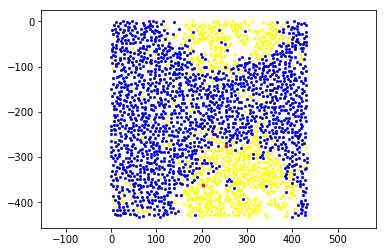

In [78]:
# test to check how is organized the matrix

print(np.shape(Mc))
f, (ax) = plt.subplots(1)

for i in range(len(Mc)):
    if Mc[i,3]==1:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='yellow', s=4)
    else:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='b', s=4)
plt.axis('equal')

ax.scatter(Mc[0,1], -Mc[0,0], marker='o', c='r', s=8)
ax.scatter(Mc[1,1], -Mc[1,0], marker='o', c='r', s=8)
# on voit que les points voisins dans la liste ne le sont pas dans le plan

Neighbors found within the radius d:
115
544
618
1225
1820
2084


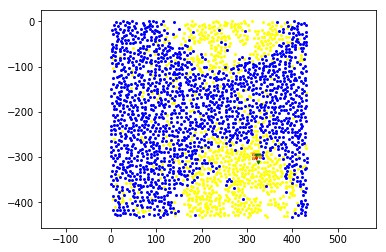

In [79]:
# check which neighbors are considered

d = 13 # cut-off distance to tune
print('Neighbors found within the radius d:')

i = 404 #28
xi = Mc[i,0]
yi = Mc[i,1]
zi = Mc[i,2]
spi = Mc[i,3]

f, (ax) = plt.subplots(1)

ax.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
ax.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

ax.scatter(Mc[i,1], -Mc[i,0], marker='v', c='red', s=8)
plt.axis('equal')

for j in range(len(Mc)):
    xj = Mc[j,0]
    yj = Mc[j,1]
    zj = Mc[j,2]
    spj = Mc[j,3]
    
    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
        print(j)
        ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='orange', s=8)
        if spj==spi :
            ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='green', s=8)
        
plt.savefig(path_res+'neighbors'+name+'.pdf', format='pdf',bbox_inches='tight')

In [80]:
d = 13 # distance à afiner en A
# diviser par le nombre de voisins trouvés pour uniformiser ?
cpt_neigh_tot = 0 # compte le nb de voisins
cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

for i in range(len(Mc)):
    xi = Mc[i,0]
    yi = Mc[i,1]
    zi = Mc[i,2]
    spi = Mc[i,3] #valeur de la case espèce

    for j in range(len(Mc)):
        xj = Mc[j,0]
        yj = Mc[j,1]
        zj = Mc[j,2]
        spj = Mc[j,3]

        if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
            cpt_neigh_tot+=1
            if spj==spi :
                cpt_neigh_sp+=1
                
print(cpt_neigh_tot)
print(cpt_neigh_tot/len(Mc))
print(cpt_neigh_sp)
print(cpt_neigh_sp/len(Mc))

14304
5.70334928229665
11774
4.6945773524720895


In [81]:
time_simu = 20 # microseconds
nb_frames_simu = 20000

In [82]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)


l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5254
number of lipids in the upper leaflet: 2658 + number of lipids in the lower leaflet:2596 
= 5254


In [ ]:
# compute the mean number of neighbors of the same species through time

tmes = 50 # frequency of the measure

time = []
neigh_tot = []
neigh_sp = []


for ts in u.trajectory:
     if (ts.frame%tmes == 0):
            print(ts.frame)
            time.append(ts.frame/ (nb_frames_simu/time_simu))
            
            xmin=0
            ymin=0
                        
            Lo = leaflet0.select_atoms("name PO4 and resname DPPC").positions
            Ld = leaflet0.select_atoms("name PO4 and resname DIPC").positions

            Lo2 = np.zeros((len(Lo),4))
            Lo2[:,0] = Lo[:,0]
            Lo2[:,1] = Lo[:,1]
            Lo2[:,2] = Lo[:,2]
            Lo2[:,3] = 1

            Ld2 = np.zeros((len(Ld),4))
            Ld2[:,0] = Ld[:,0]
            Ld2[:,1] = Ld[:,1]
            Ld2[:,2] = Ld[:,2]
            Ld2[:,3] = 0
            
            Mc=np.vstack((Lo2,Ld2))
            
            d = 13 # distance à afiner 
            # diviser par le nombre de voisins trouvés pour uniformiser ?
            cpt_neigh_tot = 0 # compte le nb de voisins
            cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

            for i in range(len(Mc)):
                xi = Mc[i,0]
                yi = Mc[i,1]
                zi = Mc[i,2]
                spi = Mc[i,3] #valeur de la case espèce

                for j in range(len(Mc)):
                    xj = Mc[j,0]
                    yj = Mc[j,1]
                    zj = Mc[j,2]
                    spj = Mc[j,3]

                    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i :
                        cpt_neigh_tot+=1
                        if spj==spi :
                            cpt_neigh_sp+=1
                            
            neigh_tot.append(cpt_neigh_tot/len(Mc))
            neigh_sp.append(cpt_neigh_sp/len(Mc))
              

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600


In [52]:
#print(time)
print(neigh_tot)
print(neigh_sp)

[5.683471074380165, 5.788429752066116, 5.792561983471074, 5.743801652892562, 5.7727272727272725, 5.763636363636364, 5.744628099173553, 5.797520661157025, 5.8, 5.770247933884297, 5.746280991735537, 5.783471074380166, 5.7330578512396695, 5.732231404958678, 5.783471074380166, 5.69504132231405, 5.797520661157025, 5.753719008264463, 5.789256198347108, 5.804132231404958, 5.762809917355372, 5.756198347107438, 5.769421487603306, 5.757851239669422, 5.741322314049587, 5.785123966942149, 5.7388429752066115, 5.736363636363636, 5.7809917355371905, 5.771074380165289, 5.776859504132231, 5.734710743801653, 5.823140495867769, 5.775206611570248, 5.753719008264463, 5.740495867768595, 5.8066115702479335, 5.79504132231405, 5.790082644628099, 5.744628099173553, 5.768595041322314, 5.771900826446281, 5.7611570247933885, 5.8148760330578515, 5.764462809917355, 5.756198347107438, 5.812396694214876, 5.812396694214876, 5.749586776859504, 5.812396694214876, 5.8264462809917354, 5.789256198347108, 5.762809917355372, 

In [53]:
np.save(path_res+'time_phase_sep.npy', time)
np.save(path_res+'neigh_tot'+name+'.npy', neigh_tot)
np.save(path_res+'neigh_sp'+name+'.npy', neigh_sp)

In [54]:
name0 = '_DPPC_DIPC_chol_352'
path_res0 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
name5 = '_DPPC_DIPC_chol_352_5GM1_sup'
path_res5 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'
name10 = '_DPPC_DIPC_chol_352_10GM1_sup'
path_res10 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

t = np.load(path_res5+'time_phase_sep.npy')

l0t = np.load(path_res0+'neigh_tot'+name0+'.npy')
l0s = np.load(path_res0+'neigh_sp'+name0+'.npy')

l5t = np.load(path_res5+'neigh_tot'+name5+'.npy')
l5s = np.load(path_res5+'neigh_sp'+name5+'.npy')

l10t = np.load(path_res10+'neigh_tot'+name10+'.npy')
l10s = np.load(path_res10+'neigh_sp'+name10+'.npy')

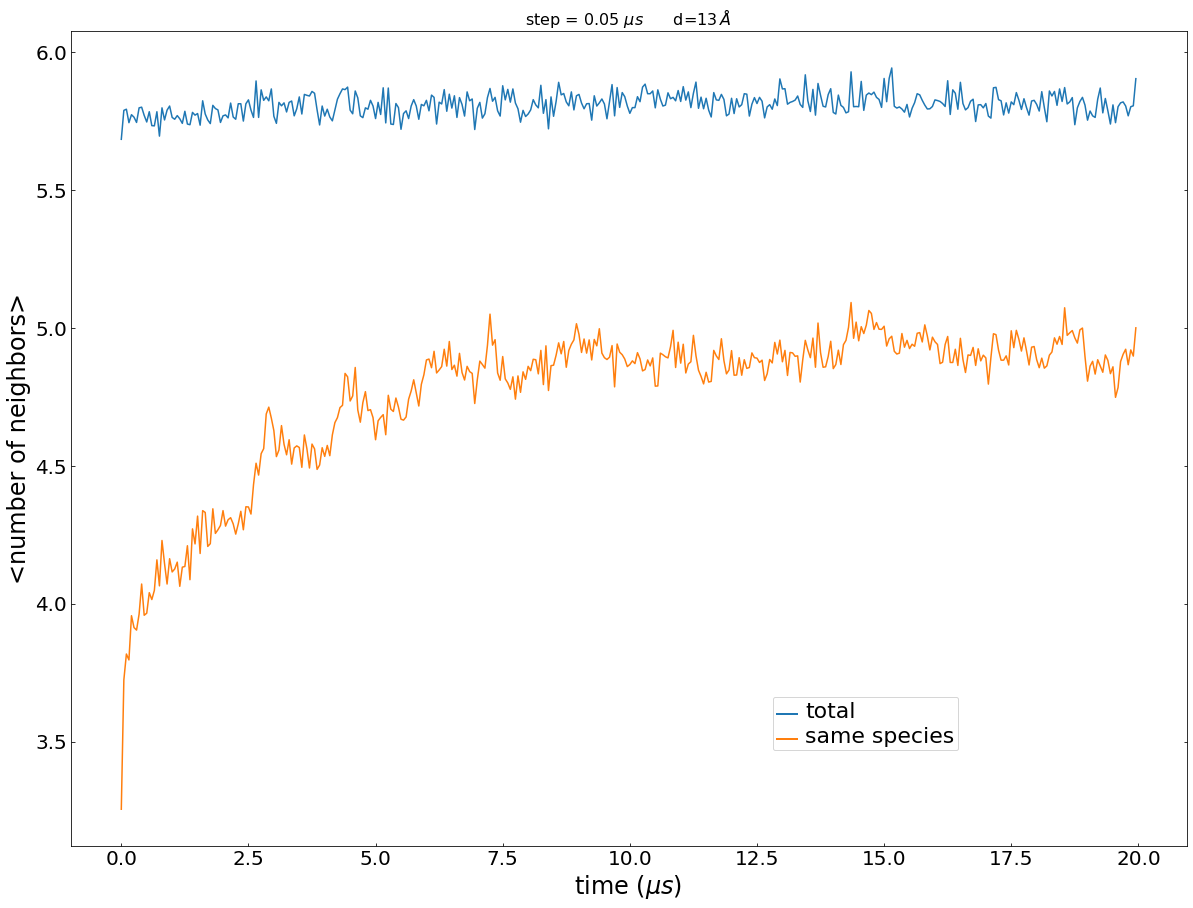

In [56]:
# plot of the mean number of neighbors of the same species and the total mean number of neighbors through time
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(time,neigh_tot,label = 'total')
ax.plot(time,neigh_sp, label = 'same species')

#ax.plot(t,l5t,label = 'tot5')

#ax.plot(t[:100],l0s,label = '0GM1')
#ax.plot(t,l5s,label = '5GM1')
#ax.plot(t,l10s,label = '10GM1')

plt.xlabel('time ($\mu s$)',fontsize=24)
plt.ylabel('<number of neighbors>',fontsize=24)

legend = ax.legend(loc='right', bbox_to_anchor=(0.8, 0.15))
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
#frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize(22)
for label in legend.get_lines():
    label.set_linewidth(2)  # the legend line width
    
ax.set_title('step = %.2lf $\mu s$\t d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path_res+'neigh_time'+name+'_long50.pdf', format='pdf',bbox_inches='tight')

In [57]:
tx = np.array(time)
ny = np.array(neigh_sp)

In [ ]:
#------------------Fit pour une simulation----------------------------------
fig, ax = plt.subplots(figsize=(20, 12))

def fitFunc(t,A,tau,B):
        return A*(1-np.exp(-t/tau)) + B

start = [10.0,1.0,2.0]
#param_bounds=([0,0,0],[100,100,10000])

param, evol = curve_fit(fitFunc, tx, ny, p0 = start) #bounds=param_bounds
print(param)


ax.plot(tx,fitFunc(tx, *param), 'red')
ax.plot(tx, ny, ':b.')

plt.xlabel('time ($\mu s$)',fontsize=24)
plt.xticks(fontsize=16)
plt.ylabel('<nb of neighbors of the same species>',fontsize=24)
plt.yticks(fontsize=16)
plt.annotate('$ <n>(t)= %.1f- %.1fe^{-t/ %.1f } $' % (param[0]+param[2],param[0],param[1]), color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 4))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param[1], color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 3.75))

ax.set_title('step = %.2lf $\mu s$\t d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), fontsize=16)
ax.tick_params(labelsize=20)

ax.xaxis.set_tick_params(direction="in", which="both")
ax.yaxis.set_tick_params(direction="in", right=True, which="both")

plt.savefig(path_res+'fit_neigh_time'+name+'_long50.pdf', format='pdf',bbox_inches='tight')